In [1]:
# NON MOLTO INTUITIVO, RIPASSALO
import pyspark
from random import randint, random, choice
import matplotlib.pyplot as plt

sc = pyspark.SparkContext('local[*]')

In [10]:
from dataGenerator.rowGenerator import *
from dataGenerator.datasetGenerator import *
from datetime import datetime

dataset = datasetGenerator()
dataset.addGenerator(intGenerator(),min=1,max=100,keyName="bookId")
dataset.addGenerator(intGenerator(),min=1,max=1000,keyName="tokenId")

rdd = sc.parallelize(dataset.generateDataset(100000)).persist()

In [11]:
rdd.first()

{'bookId': 31, 'tokenId': 913}

In [12]:
# calcola la term frequency dei token rispetto ai book (quanti libri hanno un solo token? quanti 2? ecc)
reduced = rdd.map(lambda x: ((x.get('bookId'), x.get("tokenId")), 1)).reduceByKey(lambda a,b: a+b)
reduced.top(10, lambda x: x[1])

[((62, 940), 7),
 ((65, 86), 7),
 ((42, 402), 7),
 ((9, 283), 7),
 ((48, 290), 6),
 ((93, 93), 6),
 ((11, 895), 6),
 ((86, 848), 6),
 ((7, 923), 6),
 ((62, 48), 6)]

In [22]:
# essenzialmente una count frequency sulla quantita' di prima
res = reduced.map(lambda x: (x[1], 1)).reduceByKey(lambda a,b: a+b)
res.top(10, lambda x: x[1])

[(1, 36810), (2, 18133), (3, 6295), (4, 1549), (5, 279), (6, 70), (7, 4)]

<BarContainer object of 7 artists>

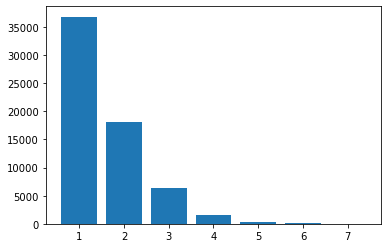

In [23]:
plt.bar(res.map(lambda x: x[0]).collect(), res.map(lambda x: x[1]).collect())